In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud,STOPWORDS


In [3]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
regime_data =pd.read_csv("/content/gdrive/MyDrive/data sets/Regime01.csv",encoding = "ISO-8859-1")
imp_data =pd.read_csv("/content/gdrive/MyDrive/data sets/imported01.csv",encoding = "ISO-8859-1")
data=regime_data.merge(imp_data, how='outer')

In [7]:
data.to_csv("WSM.csv", index = False)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18834 entries, 0 to 18833
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  18834 non-null  object 
 1   Tweet Id  18834 non-null  float64
 2   Text      18834 non-null  object 
 3   Username  18834 non-null  object 
 4   Hashtag   5648 non-null   object 
 5   Views     4498 non-null   float64
 6   Retweet   18834 non-null  int64  
 7   Place     410 non-null    object 
 8   Lang      18834 non-null  object 
 9   Source    18834 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.6+ MB


In [5]:
data.head()

,Datetime,Tweet Id,Text,Username,Hashtag,Views,Retweet,Place,Lang,Source
0,2023-02-28 22:22:22+00:00,1.630690e+18,@WilliamRHawkins @molotov2_5 @DanielLMcAdams @...,chinoslims,NaN,34.0,0,NaN,en,Twitter for Android
1,2023-02-28 20:41:57+00:00,1.630670e+18,Downward spiral of regime change continues to ...,kamranalishah,NaN,24.0,0,NaN,en,Twitter for Android
2,2023-02-28 19:24:42+00:00,1.630650e+18,Imran Khan Government was the most public frie...,FactCheckAsia,NaN,603.0,12,NaN,en,Web App
3,2023-02-28 13:15:11+00:00,1.630560e+18,@HniaziISF Hassan what is the method to remove...,sandyskye22,NaN,70.0,0,NaN,en,Twitter for iPhone
4,2023-02-28 11:10:54+00:00,1.630530e+18,The reprehensible arrest of Amjad Shoaib shows...,Shahidparvezak2,['Ø®Ø§Ù_Ø¨Ù ÙØ§Ø¨ÙÛ_Ú©Ø±Ù¾Ù¹_ÙØ¸Ø§Ù '],611.0,66,NaN,en,Twitter for iPhone


In [5]:
def get_tweets(data,remover='U'):
  text = ",".join(content for content in data.Text if "https" not in content and remover not in content)
  return text
def draw_wordcloud(words=200,color="white",content="deagault text"):
  wordcloud = WordCloud(max_words=words,colormap='Set3',background_color=color).generate(content)
  plt.figure(figsize=(10,12))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.title('Prevalent words in tweets',fontsize=19)
  plt.show()





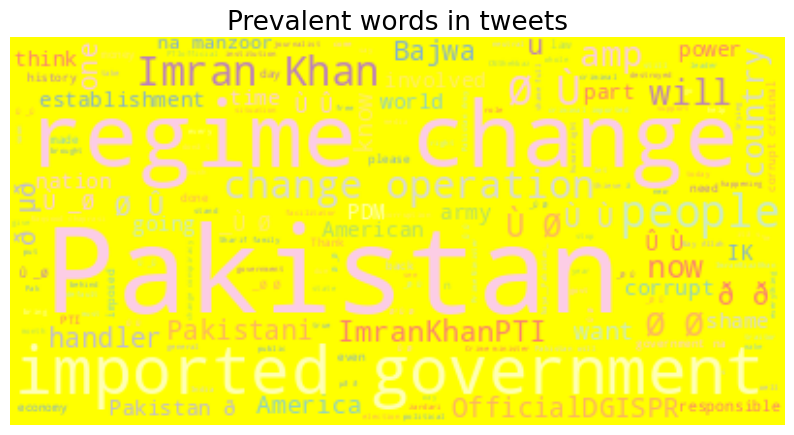

In [18]:
text=get_tweets(data)
draw_wordcloud(content=text,words=200, color="yellow")

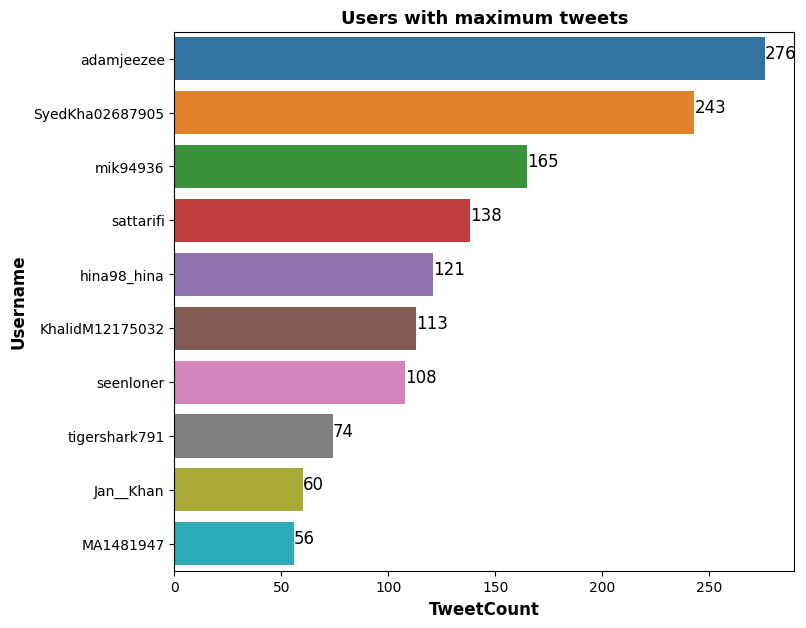

In [14]:
regime_data =pd.read_csv("/content/gdrive/MyDrive/data sets/WSM.csv",encoding = "ISO-8859-1")
username_count = regime_data['Username'].value_counts().reset_index().rename(columns={
    'Username':'tweet_count','index':'Username'})

plt.figure(figsize=(8, 7))
sns.barplot(y='Username',x='tweet_count',data=username_count.head(10))
y=username_count['tweet_count'].head(10)
for index, value in enumerate(y):
    plt.text(value, index, str(value),fontsize=12)
plt.title('Users with maximum tweets',weight='bold', size=13)
plt.ylabel('Username', size=12, weight='bold')
plt.xlabel('TweetCount', size=12, weight='bold')
plt.show()

In [ ]:
data['Datetime']=data['Datetime'].apply(lambda x:x[:-6])
data['Datetime']



0        2023-02-28 22:22:22
1        2023-02-28 20:41:57
2        2023-02-28 19:24:42
3        2023-02-28 13:15:11
4        2023-02-28 11:10:54
                ...         
18829    2022-08-12 16:19:54
18830    2022-08-12 16:15:33
18831    2022-08-12 16:14:03
18832    2022-08-12 15:56:35
18833    2022-08-12 15:51:10
Name: Datetime, Length: 18834, dtype: object

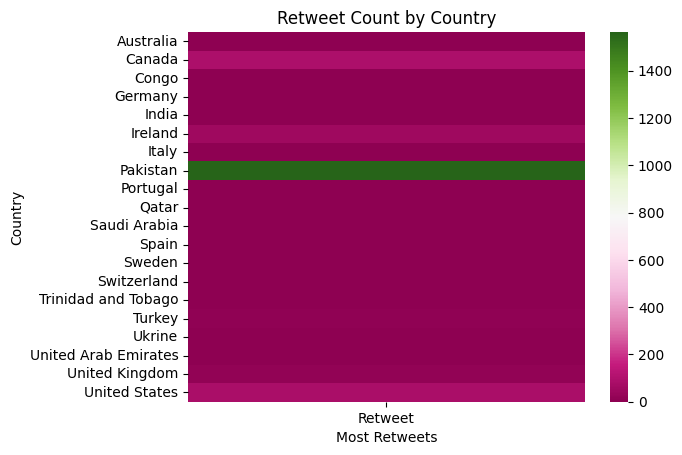

In [13]:
regime_data =pd.read_csv("/content/gdrive/MyDrive/data sets/WSM.csv",encoding = "ISO-8859-1")
pivot_table = pd.pivot_table(regime_data, index='Place', values="Retweet" ,aggfunc='sum')
sns.heatmap(pivot_table, cmap='PiYG')
plt.xlabel('Most Retweets')
plt.ylabel('Country')
plt.title('Retweet Count by Country')
plt.show()

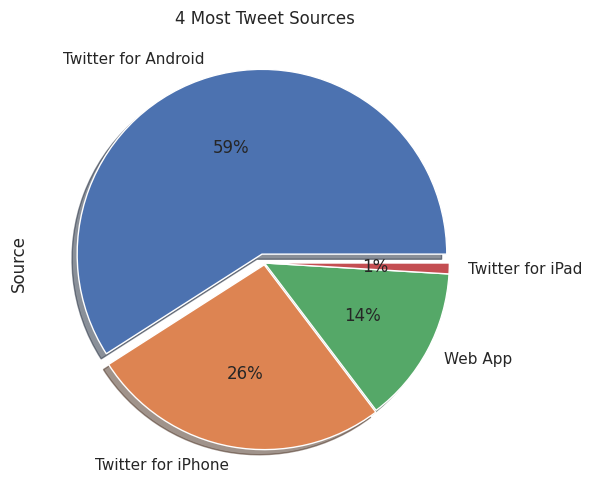

In [ ]:
from matplotlib.legend import Shadow
pla = regime_data['Source'].value_counts().sort_values(ascending=False)
explode = (0.05, 0.01, 0, 0) 
plt.figure(figsize=(6,6))
pla[0:4].plot(kind = 'pie', title = '4 Most Tweet Sources', autopct='%.0f%%', explode=explode, shadow=True)
plt.show()

Text(0.5, 1.0, 'Users with highest tweet views')

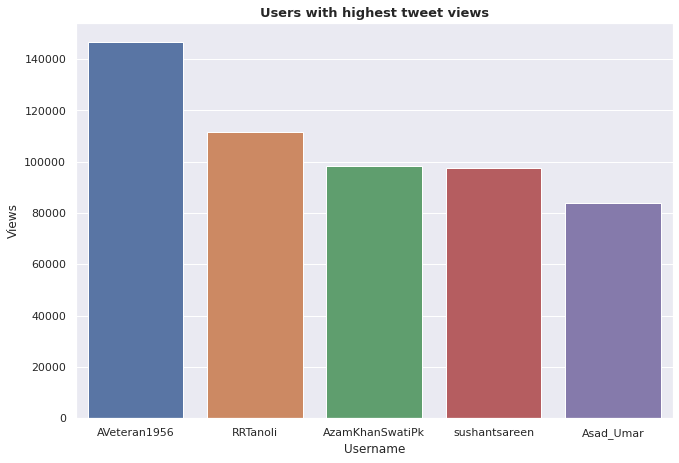

In [ ]:
chart=regime_data.sort_values(by='Views',ascending=False)
xy=chart['Username'].head(5)
sns.set(rc={'figure.figsize':(10.7,7.27)})
sns.barplot(data=chart, x=xy, y="Views")
plt.title('Users with highest tweet views', weight='bold', size=13)

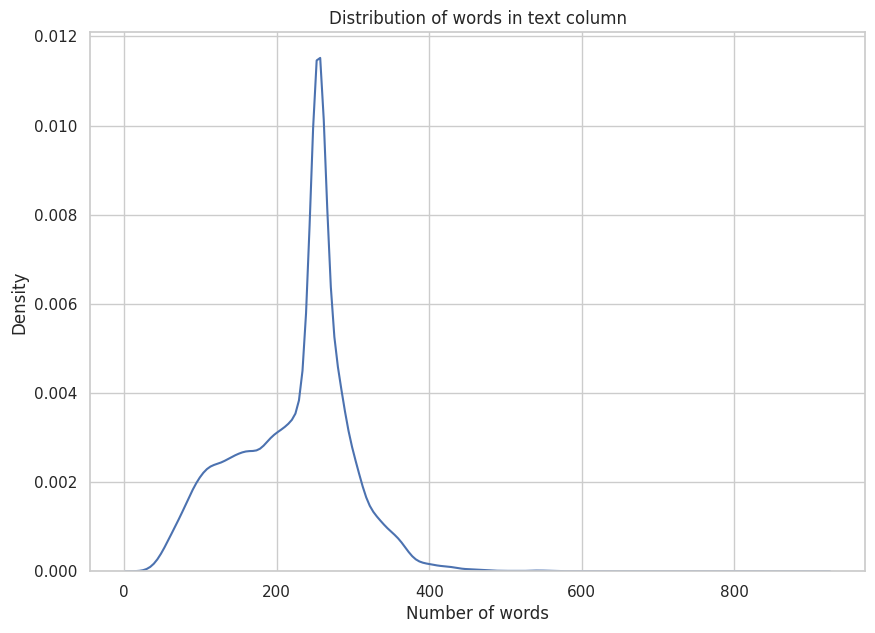

In [ ]:
regime_data["num of words in text"] = regime_data["Text"].apply(lambda x: len(x))
plt.figure(figsize=(10,7))
sns.kdeplot(regime_data["num of words in text"])
plt.title("Distribution of words in text column")
plt.xlabel("Number of words")
plt.show()

In [12]:
from numpy.core.fromnumeric import swapaxes
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import string
nltk.download('stopwords')
punc=string.punctuation
sw = stopwords.words('english')
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
from textblob import TextBlob

def cleaner(text):
  text=text.lower()
  
  text = re.sub('https?://\S+|www\.\S+', ' ', text)
  #text=re.sub('\b[ã]\w+\b','',text)
  text=re.sub('[^a-zA-Z0-9_]', ' ', text)
  text = re.sub('<.*?>+', ' ', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
  text = re.sub('\w*\d\w*', ' ', text)
  text = re.sub('\n', ' ', text)
  
  words=TextBlob(text).words
  
  special=['pakistan','regime','change','amp','imported','government','allah']
  
  clean_text=[]
  for x in words:
    if x not in sw and len(x)>2 and x not in special:
      #clean_text="".join(lemmatizer.lemmatize(x) )
      clean_text.append(lemmatizer.lemmatize(x))
  tweet=" ".join(clean_text)
  print('------------------------------------------------------------------------>>>>>>')
  print(tweet)
  return tweet


In [19]:
regime_data =pd.read_csv("/content/gdrive/MyDrive/data sets/WSM.csv",encoding = "ISO-8859-1")
regime_data.info()
regime_data['Text']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  18834 non-null  object 
 1   Tweet Id  18834 non-null  float64
 2   Text      18834 non-null  object 
 3   Username  18834 non-null  object 
 4   Hashtag   5648 non-null   object 
 5   Views     4498 non-null   float64
 6   Retweet   18834 non-null  int64  
 7   Place     410 non-null    object 
 8   Lang      18834 non-null  object 
 9   Source    18834 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.4+ MB


0        @WilliamRHawkins @molotov2_5 @DanielLMcAdams @...
1        Downward spiral of regime change continues to ...
2        Imran Khan Government was the most public frie...
3        @HniaziISF Hassan what is the method to remove...
4        The reprehensible arrest of Amjad Shoaib shows...
                               ...                        
18829    @EhteshamUllah9 @SehriMunirMaan This imported ...
18830    ARY is only being punished for exposing the im...
18831    Yes for being neutral in the time of need, to ...
18832    #ary imported government think that they will ...
18833    @Irumf And some years latter that MQM is part ...
Name: Text, Length: 18834, dtype: object

In [20]:
regime_data['Text'] = regime_data['Text'].apply(lambda x: cleaner(x))
regime_data['Text_polarity'] = regime_data['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
regime_data.head(100)

Streaming output truncated to the last 5000 lines.
------------------------------------------------------------------------>>>>>>
inflation stand staggering percent highest history broken record corruption incompetence nepotism
------------------------------------------------------------------------>>>>>>
pmln org nawazsharifmns salmabuttpmln absconder corrupt thief corruption king shame full manzoor sharif family zardari corruption king thief
------------------------------------------------------------------------>>>>>>
inflation rate incompetent time high difficult people live gujratjalsa
------------------------------------------------------------------------>>>>>>
tararattaullah cruel shame le pmln corrupt mafia thief barking lie show baz photo session manzoor sharif family zardari corruption king thief
------------------------------------------------------------------------>>>>>>
sparegions people hate traitor imposed america leader one great imran khan great leader people people


,Datetime,Tweet Id,Text,Username,Hashtag,Views,Retweet,Place,Lang,Source,Text_polarity
0,2/28/2023 22:22,1.630000e+18,williamrhawkins daniellmcadams slavyangrad off...,chinoslims,NaN,34.0,0,NaN,en,Twitter for Android,-0.200000
1,2/28/2023 20:41,1.630000e+18,downward spiral continues hurt country remains...,kamranalishah,NaN,24.0,0,NaN,en,Twitter for Android,0.200000
2,2/28/2023 19:24,1.630000e+18,imran khan public friendly history today lost ...,FactCheckAsia,NaN,603.0,12,NaN,en,Web App,0.125000
3,2/28/2023 13:15,1.630000e+18,hniaziisf hassan method remove corrupt judge p...,sandyskye22,NaN,70.0,0,NaN,en,Twitter for iPhone,-0.050000
4,2/28/2023 11:10,1.630000e+18,reprehensible arrest amjad shoaib show democra...,Shahidparvezak2,['ÃÂ®ÃÂ§ÃÂ_ÃÂ¨ÃÂ ÃÂÃÂ§ÃÂ¨ÃÂÃÂ_Ã...,611.0,66,NaN,en,Twitter for iPhone,0.083333
...,...,...,...,...,...,...,...,...,...,...,...
95,2/23/2023 18:00,1.630000e+18,never let compromise kashmir undergone nasty c...,HumairaWajahat,NaN,517.0,2,NaN,en,Twitter for iPhone,-0.300000
96,2/23/2023 17:30,1.630000e+18,mumbaichadon related bharat george soros invol...,munasebolo,NaN,224.0,0,NaN,en,Twitter for Android,0.000000
97,2/23/2023 17:25,1.630000e+18,callsignmujahid clear operation launched ameri...,DrWajid91,NaN,13.0,0,NaN,en,Twitter for Android,0.050000
98,2/23/2023 15:19,1.630000e+18,btpakistan sale buyer family selling side inte...,KashifM61189854,NaN,135.0,0,NaN,en,Twitter for Android,0.000000


In [ ]:
regime_data.tail()

,Datetime,Tweet Id,Text,Username,Hashtag,Views,Retweet,Place,Lang,Source,Text_polarity
18829,8/12/2022 16:19,1.560000e+18,sehrimunirmaan imported govt imposed force day...,Azimnasim4,NaN,NaN,0,NaN,en,Twitter for Android,0.000000
18830,8/12/2022 16:15,1.560000e+18,ary punished exposing imported government stan...,amnakhani123,NaN,NaN,14,Pakistan,en,Twitter for iPhone,0.433333
18831,8/12/2022 16:14,1.560000e+18,yes neutral time need encourage always stay ne...,HN18770412,NaN,NaN,0,NaN,en,Twitter for Android,0.050000
18832,8/12/2022 15:56,1.560000e+18,ary imported government think kill voice possible,EngrSyed3,['ary'],NaN,0,NaN,en,Twitter for Android,0.000000
18833,8/12/2022 15:51,1.560000e+18,irumf year latter mqm part current imported go...,pakistan_khaan,NaN,NaN,0,NaN,en,Twitter for iPhone,0.000000


In [14]:
def SentimentChecker (Tweets):
    newDF = pd.DataFrame(columns=['Text','subjectivity','polarity', 'sentiment'])
    polarity=[]
    for i in Tweets: 
        blob = TextBlob(i) #Create Textblob object of a tweet
        pol = blob.sentiment.polarity
        sub = blob.sentiment.subjectivity
        polarity.append(pol)
        if pol > 0 : #If polarity of tweets is positive then sent = positive
            sent = "positive"
        elif pol < 0: #If polarity of tweet is negative then sent = negative
            sent = "negative"
        else: #If polarity equals 0 then sent = neutral
            sent = "neutral"
        
        #Create row for dataframe
        row = [i, sub, pol, sent] 
        #Add row to dataframe
        newDF.loc[len(newDF)] = row 
    return newDF,polarity

In [15]:
def JointPlotter(newDF):
    #Create jointplot for polarity and subjectivity of twitter tweets.
    sns.jointplot(data=newDF, x="subjectivity", y="polarity", hue="sentiment")
    plt.show()
    
    sentimentCounts = pd.DataFrame(newDF["sentiment"].value_counts())
    sentimentCounts = sentimentCounts.rename({'sentiment': 'count'}, axis=1)
    sentimentCounts["sentiment"] = sentimentCounts.index
    
    sns.barplot(data= sentimentCounts, x="sentiment", y = "count") #Create barplot of sentiment counts
    
    plt.show()

In [16]:
def visualiser(subset):
    #Create frequency distribution for "subset"
    fdist = nltk.FreqDist()
    for i in subset["Text"]:
        i = nltk.word_tokenize(i)
        for j in i:
            fdist[j] +=1
    plt.figure(figsize=(8,6))
    fdist.plot(30, cumulative=False)
    
    #Create word cloud for "subset"
    wordcloud = WordCloud(max_font_size=50, max_words = 100, background_color="black").generate_from_frequencies(fdist)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

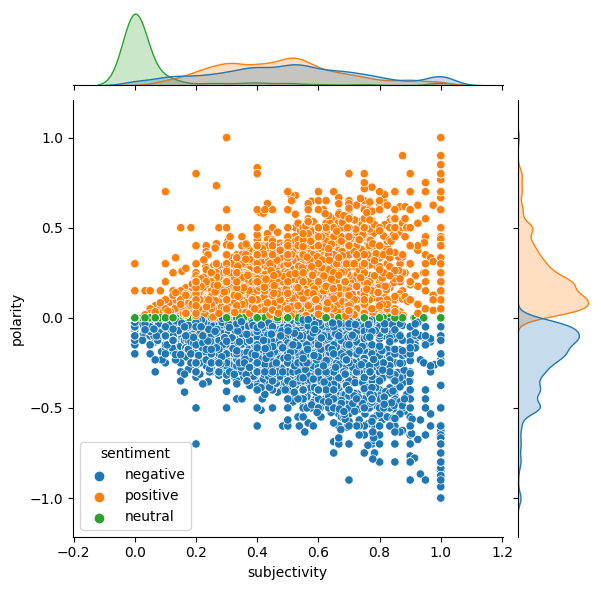

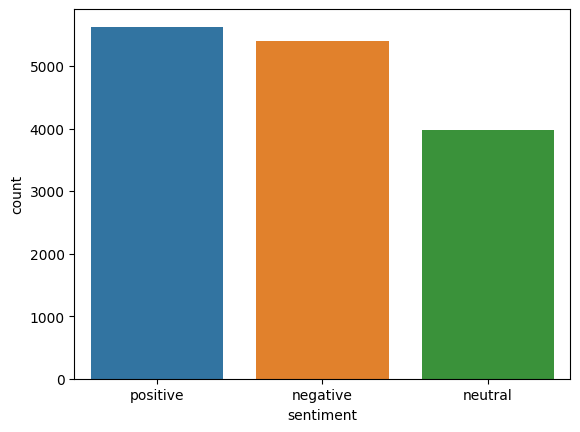

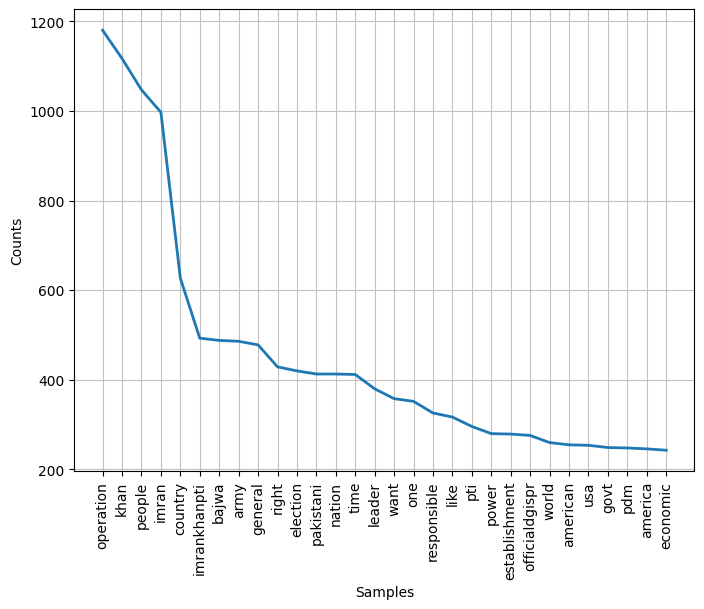

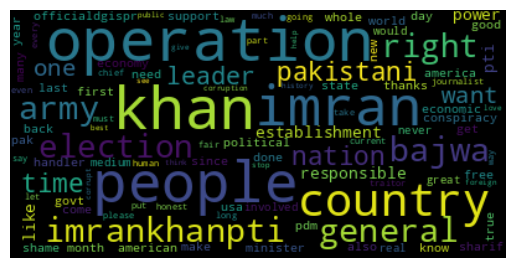

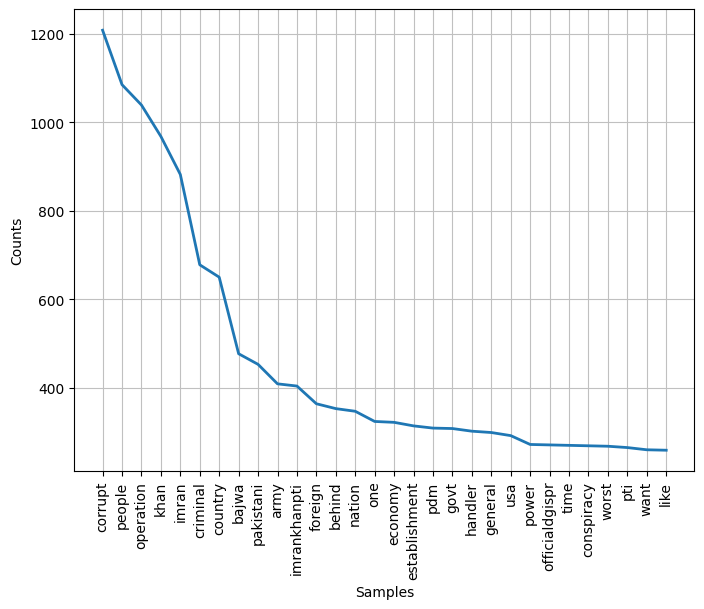

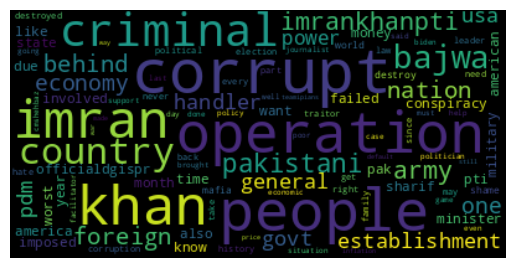

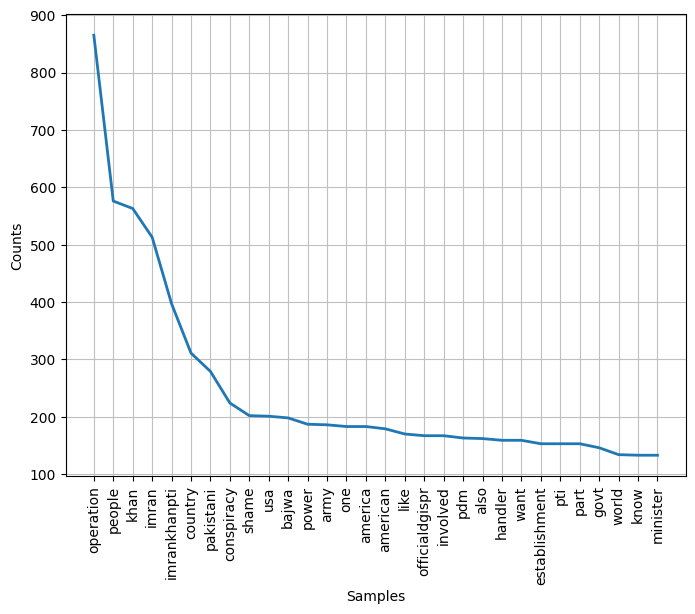

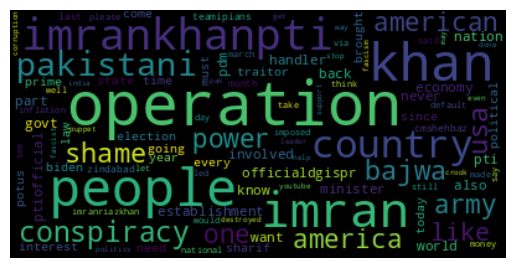

In [21]:
cleanTweets=regime_data['Text'].head(15000)
SentimentDF,polarity = SentimentChecker(cleanTweets)
JointPlotter(SentimentDF)
    
#Call visualiser function to plot a wordcloud and a frequency distribution
visualiser(SentimentDF[SentimentDF["sentiment"] == "positive"])
visualiser(SentimentDF[SentimentDF["sentiment"] == "negative"])
visualiser(SentimentDF[SentimentDF["sentiment"] == "neutral"])

In [ ]:
data = regime_data[['Text','Text_polarity']]


In [ ]:
data.shape

(18834, 2)

In [ ]:
data.head(200)

,Text,Text_polarity
0,williamrhawkins daniellmcadams slavyangrad off...,-2.000000e-01
1,downward spiral regime change continues hurt c...,2.000000e-01
2,imran khan government public friendly governme...,1.250000e-01
3,hniaziisf hassan method remove corrupt judge p...,-5.000000e-02
4,reprehensible arrest amjad shoaib show democra...,8.333333e-02
...,...,...
195,georgesoros one player within ecosystem includ...,0.000000e+00
196,goddeketal disclosetv kamalaharris pfizer regi...,0.000000e+00
197,pakistanomy also judiciary standing number glo...,9.251859e-18
198,thief never admits theft situation usa regardi...,0.000000e+00


In [ ]:
data=data[data['Text_polarity']!=0]

In [ ]:
data.head(200)

,Text,Text_polarity
0,williamrhawkins daniellmcadams slavyangrad off...,-0.200000
1,downward spiral regime change continues hurt c...,0.200000
2,imran khan government public friendly governme...,0.125000
3,hniaziisf hassan method remove corrupt judge p...,-0.050000
4,reprehensible arrest amjad shoaib show democra...,0.083333
...,...,...
267,yes good old day overseas youthiyas uploading ...,0.100000
270,javedatahir see bajwa mentality thought finish...,0.275000
271,look like beginning end army general pdm start...,0.050000
272,key player regime change conspiracy traitor co...,-0.100000


In [ ]:
data['Text_polarity'][data['Text_polarity']>0]=1
data['Text_polarity'][data['Text_polarity']<0]=0
data.head(200)

<ipython-input-26-706016348aab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Text_polarity'][data['Text_polarity']<0]=0


,Text,Text_polarity
0,williamrhawkins daniellmcadams slavyangrad off...,0.0
1,downward spiral regime change continues hurt c...,1.0
2,imran khan government public friendly governme...,1.0
3,hniaziisf hassan method remove corrupt judge p...,0.0
4,reprehensible arrest amjad shoaib show democra...,1.0
...,...,...
267,yes good old day overseas youthiyas uploading ...,1.0
270,javedatahir see bajwa mentality thought finish...,1.0
271,look like beginning end army general pdm start...,1.0
272,key player regime change conspiracy traitor co...,0.0


In [ ]:
data.shape

(13784, 2)

In [ ]:
X=data.Text
y=data.Text_polarity

In [ ]:
!pip install keras
!pip install tensorflow
import tensorflow.keras
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.cm as cm
from matplotlib import rcParams
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re
import string
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, y, test_size=0.3, random_state=2)

In [ ]:
def tensorflow_based_model(): #Defined tensorflow_based_model function for training tenforflow based model
    inputs = Input(name='inputs',shape=[max_len])#step1
    layer = Embedding(2000,50,input_length=max_len)(inputs) #step2
    layer = LSTM(64)(layer) #step3
    layer = Dense(256,name='FC1')(layer) #step4
    layer = Activation('relu')(layer) # step5
    layer = Dropout(0.5)(layer) # step6
    layer = Dense(1,name='out_layer')(layer) #step4 again but this time its giving only one output as because we need to classify the tweet as positive or negative
    layer = Activation('sigmoid')(layer) #step5 but this time activation function is sigmoid for only one output.
    model = Model(inputs=inputs,outputs=layer) #here we are getting the final output value in the model for classification
    return model #function returning the value when we call it

In [ ]:
from tensorflow.keras.optimizers import Adam
model = tensorflow_based_model() # here we are calling the function of created model
learning_rate = 0.7  # Set the desired learning rate

optimizer = Adam(learning_rate=learning_rate)
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])  

In [ ]:
history=model.fit(X_train,Y_train,batch_size=80,epochs=12, validation_split=0.15)# here we are starting the training of model by feeding the training data
print('Training finished !!')

Epoch 1/12
103/103 [==============================] - 53s 479ms/step - loss: 0.6724 - accuracy: 0.5820 - val_loss: 0.5579 - val_accuracy: 0.6968
Epoch 2/12
103/103 [==============================] - 47s 461ms/step - loss: 0.4082 - accuracy: 0.8240 - val_loss: 0.3409 - val_accuracy: 0.8612
Epoch 3/12
103/103 [==============================] - 53s 514ms/step - loss: 0.2598 - accuracy: 0.9009 - val_loss: 0.4393 - val_accuracy: 0.8287
Epoch 4/12
103/103 [==============================] - 49s 479ms/step - loss: 0.2086 - accuracy: 0.9233 - val_loss: 0.3008 - val_accuracy: 0.8798
Epoch 5/12
103/103 [==============================] - 49s 469ms/step - loss: 0.1810 - accuracy: 0.9326 - val_loss: 0.3039 - val_accuracy: 0.8854
Epoch 6/12
103/103 [==============================] - 47s 459ms/step - loss: 0.1544 - accuracy: 0.9443 - val_loss: 0.3361 - val_accuracy: 0.8833
Epoch 7/12
103/103 [==============================] - 50s 487ms/step - loss: 0.1338 - accuracy: 0.9534 - val_loss: 0.3326 - val_ac

In [ ]:
accr1 = model.evaluate(X_test,Y_test) #we are starting to test the model here

130/130 [==============================] - 13s 98ms/step - loss: 0.4185 - accuracy: 0.8762


In [ ]:
print('Test set\n  Accuracy: {:0.2f}'.format(accr1[1]))

Test set
  Accuracy: 0.88


In [ ]:
y_pred = model.predict(X_test) #getting predictions on the trained model
y_pred = (y_pred > 0.5) 

130/130 [==============================] - 13s 89ms/step




confusion matrix


[[1762  297]
 [ 215 1862]]




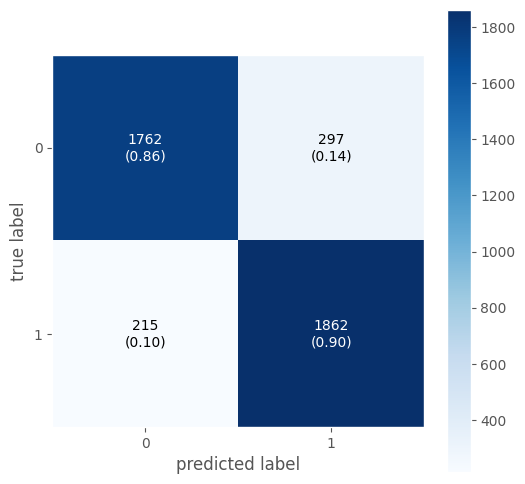

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(Y_test, y_pred)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(6, 6),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

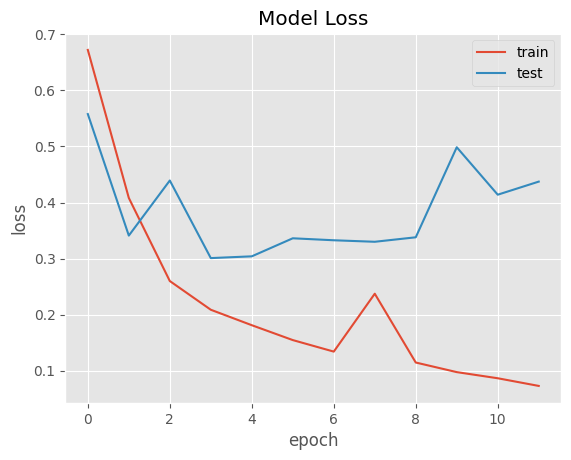

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

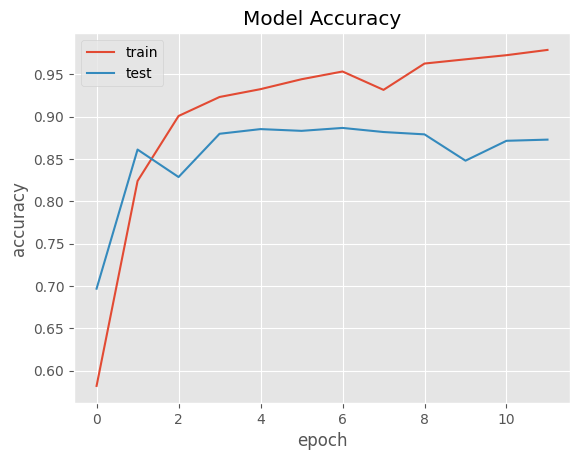

In [ ]:
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()